<a href="https://colab.research.google.com/github/vadhri/distibuted-optimization/blob/main/graph_consensus/distributed_decentrarlized_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

converged in 17716 iters at 4.9976685878811155e-05 f(x) = 1.2488345719530322e-09


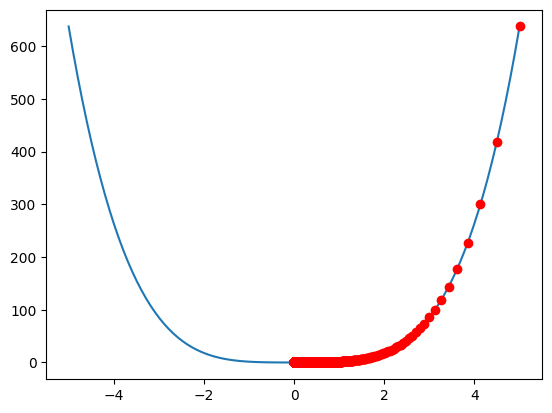

In [171]:
# normal gradient descent.
# f(x) = x**4 + 0.5*x2
import matplotlib.pyplot as plt
import numpy as np

def grad(x):
  return 0.5*x + 4*(x**3)

x_init = 5
tol = 0.00005

hist = np.array([x_init])

while x_init > tol:
  x_init = x_init - 0.001*grad(x_init)
  hist = np.append(hist, x_init)

print (f'converged in {len(hist)} iters at {hist[-1]} f(x) = {x_init**4 + 0.5*x_init**2}')

# plot function x**4 + 1/2*x2
x = np.linspace(-5, 5, 100)
y = x**4 + 0.5*x**2
plt.plot(x, y)

#plot the path history on the graph as y
plt.plot(hist, hist**4 + 0.5*hist**2, 'ro')

plt.show()


f(x) = $t_0 + t_1. x + t_2 . x^2+ t_3 . x^3 + t_4 . x^4 + t_5 . x^5 $

In [172]:
# normal gradient descent.
# f(x) = x**4 + 0.5*x2
import matplotlib.pyplot as plt
import numpy as np

degree = 5
agents = 2

def f(x):
  return x**4 + 0.5*x**2

def design_matrix(x, degree=4):
    return np.vstack([x**i for i in range(degree+1)]).T

x_pve = np.linspace(0.1, 2.0, 50)
x_nve = 2 * np.linspace(-2.0, 0, 50)

X_pve = design_matrix(x_pve)
X_nve = design_matrix(x_nve)

x_pve_vectorized = np.vstack([x_pve**i for i in range(degree)]).T
x_nve_vectorized = np.vstack([x_nve**i for i in range(degree)]).T

# make x_pve and x_nve as part of a single array.
x_vectorized = np.array([x_pve_vectorized, x_nve_vectorized])
y_vectorized = np.array([f(x_pve), f(x_nve)])

# theta values per agent
thetas = np.random.rand(agents, degree)
print(thetas.shape, thetas)


(2, 5) [[0.21906192 0.82493    0.52798891 0.80653316 0.02889346]
 [0.82807566 0.07592655 0.36517417 0.75280739 0.08561981]]


In [173]:
def local_gradient(x, t, y):
  n = x.shape[0]
  preds = x @ t
  # gradient of MSE since that is the loss function we are trying to minimize.
  grad = (2/n) * (preds - y) @ x
  return grad

def compute_loss(X, theta, y):
  preds = X @ theta
  return np.mean((preds - y)**2)

Iter 1000: Losses per agent = [np.float64(0.08690897523889397), np.float64(0.014297455268592859)], Avg loss = 0.050603215253743415
Iter 2000: Losses per agent = [np.float64(0.044185574478594634), np.float64(0.007484051555805608)], Avg loss = 0.02583481301720012
Iter 3000: Losses per agent = [np.float64(0.022706233024016597), np.float64(0.003724089229477857)], Avg loss = 0.013215161126747227
Iter 4000: Losses per agent = [np.float64(0.011684816352900534), np.float64(0.001843802505987011)], Avg loss = 0.006764309429443773
Iter 5000: Losses per agent = [np.float64(0.0060207718416238135), np.float64(0.0009099439140231398)], Avg loss = 0.0034653578778234767
Iter 6000: Losses per agent = [np.float64(0.0031068455490172193), np.float64(0.00044778849733569706)], Avg loss = 0.0017773170231764582
Iter 7000: Losses per agent = [np.float64(0.0016059317943917647), np.float64(0.00021989078893395003)], Avg loss = 0.0009129112916628574
Iter 8000: Losses per agent = [np.float64(0.0008317525709800266), n

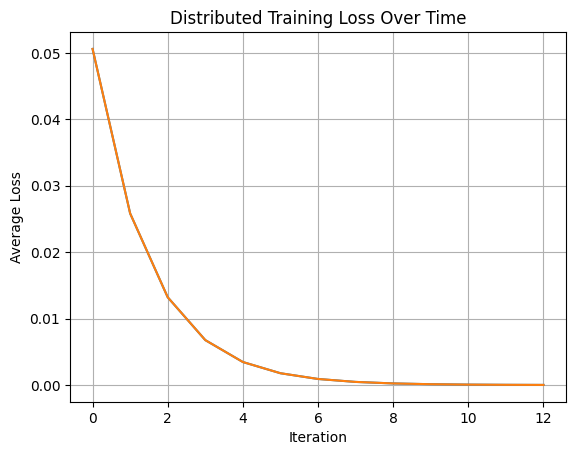

In [174]:
history = [thetas.copy()]  # store parameter snapshots over time
iters = 5000
losses = []
iter = 0
tol = 1e-5
beta = 0.8
avg_loss = 1
velocities = [np.zeros(degree) for _ in range(agents)]  # momentum vectors
lr = 0.0001

while avg_loss > tol:
  iter += 1
  grads = []

  for i in range(agents):
    grad = local_gradient(x_vectorized[i], thetas[i], y_vectorized[i])
    velocities[i] = beta * velocities[i] - lr * grad
    thetas[i] += velocities[i]
    grads.append(grad)

  # average consensus step
  thetas_avg = np.mean(thetas, axis=0)
  for i in range(agents):
      thetas[i] = thetas_avg.copy()

  # Compute and store loss after updates
  loss_values = [compute_loss(x_vectorized[i], thetas[i], y_vectorized[i]) for i in range(agents)]
  avg_loss = np.mean(loss_values)

  if iter % 1000 == 0:
    print(f"Iter {iter}: Losses per agent = {loss_values}, Avg loss = {avg_loss}")
    losses.append(avg_loss)
    history.append(thetas.copy())

#plot history
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Average Loss")
plt.title("Distributed Training Loss Over Time")
# plt.xscale('log')
plt.grid(True)
plt.plot(losses)
plt.show()


# Consensus Average


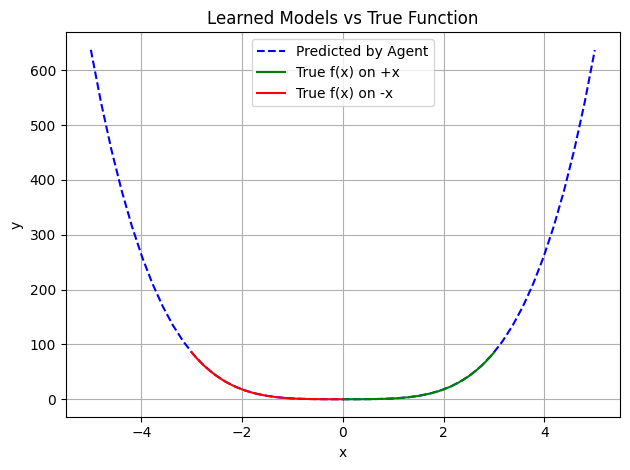

In [175]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true function
f = lambda x: x**4 + 0.5 * x**2

# Original (unnormalized) x values
x_full = np.linspace(-5.0, 5.0, 50)
x_pve = np.linspace(0.0, 3.0, 50)
x_nve = np.linspace(-3.0, 0.0, 50)


# Compute design matrices from normalized x
X_full = design_matrix(x_full)

# Use the final model from history
theta_0 = history[-1][0]   # Agent 1
theta_1 = history[-1][1]   # Agent 2

theta = 0.5*(theta_0 + theta_1)

# Predictions
y_full = X_full @ theta

# Plotting
plt.plot(x_full, y_full, color='blue', linestyle='--', label='Predicted by Agent')
plt.plot(x_pve, f(x_pve), color='green', label='True f(x) on +x')
plt.plot(x_nve, f(x_nve), color='red', label='True f(x) on -x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Learned Models vs True Function')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Distributed gradient descent.

In [176]:
!pip install igraph

In [177]:
import igraph as ig

N = 3
degree = 4

# generate a random graph
g = ig.Graph.Erdos_Renyi(n=N, m=3)
A = g.get_adjacency()
ig.plot(g, bbox=(0,0,200,200))

Iter 1000: Losses per agent = [np.float64(0.04859276349931371), np.float64(0.12403165569957306), np.float64(0.10711703482673267)], Avg loss = 0.09324715134187316
Iter 2000: Losses per agent = [np.float64(0.03181762672217951), np.float64(0.04681266597717311), np.float64(0.018552313485475775)], Avg loss = 0.032394202061609464
Iter 3000: Losses per agent = [np.float64(0.012683170806162897), np.float64(0.02278270563911951), np.float64(0.005387513653108881)], Avg loss = 0.013617796699463764
Iter 4000: Losses per agent = [np.float64(0.005033451285591071), np.float64(0.011982854928272495), np.float64(0.001977733278479506)], Avg loss = 0.006331346497447691
Iter 5000: Losses per agent = [np.float64(0.0021277082867752106), np.float64(0.006515313972691027), np.float64(0.0008837301034529634)], Avg loss = 0.003175584120973067
Iter 6000: Losses per agent = [np.float64(0.0009633233438122899), np.float64(0.003602469620043002), np.float64(0.0004583698820625143)], Avg loss = 0.0016747209486392687
Iter 7

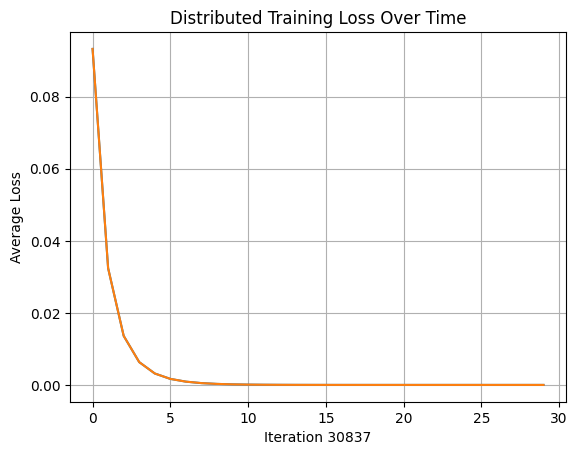

In [266]:
# generate linspace between -3 and 3
X = np.linspace(-3,3,1000)

# divide X among the N agents
X_agents = np.array_split(X, N)
X_vectorized = [np.array(design_matrix(X_agents[i])) for i in range(N)]
Y_agents = [f(X_a) for X_a in X_agents]

# theta of degree
thetas = np.random.rand(N, degree+1)
history = [thetas.copy()]
iters = 100000
losses = []
iter = 0
tol = 1e-9
beta = 0.9
avg_loss = 1
velocities = [np.zeros(degree+1) for _ in range(N)]
lr = 0.0001
neighbourhood_list = [g.neighborhood(i) for i in range(N)]
while avg_loss > tol and iter < iters:
  iter += 1
  grads = []

  for i in range(N):
    grad = local_gradient(X_vectorized[i], thetas[i].T, Y_agents[i])
    velocities[i] = beta * velocities[i] - lr * grad
    thetas[i] += velocities[i]
    grads.append(grad)

    for j in neighbourhood_list[i]:
      thetas[i] += thetas[j]

    thetas[i] /= (len(neighbourhood_list[i])+1)

    # Randomly pick a neighbour

  # Compute and store loss after updates
  loss_values = [compute_loss(X_vectorized[i], thetas[i], Y_agents[i]) for i in range(N)]
  avg_loss = np.mean(loss_values)

  if iter % (0.01*iters) == 0:
    print(f"Iter {iter}: Losses per agent = {loss_values}, Avg loss = {avg_loss}")
    losses.append(avg_loss)
    history.append(thetas.copy())

#plot history
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel(f"Iteration {iter}")
plt.ylabel("Average Loss")
plt.title("Distributed Training Loss Over Time")
# plt.xscale('log')
plt.grid(True)
plt.plot(losses)
plt.show()

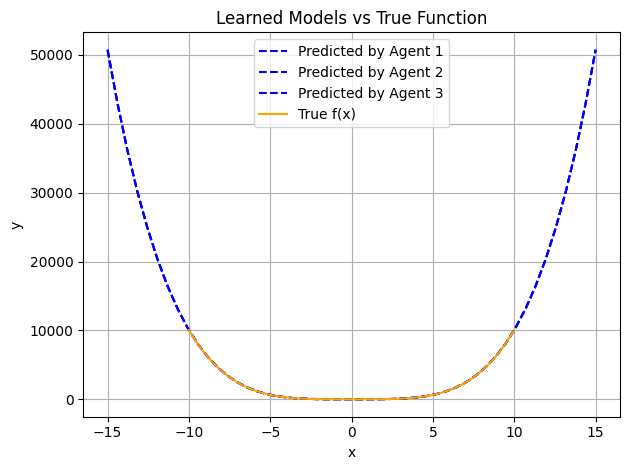

In [263]:
# Original (unnormalized) x values
x_full = np.linspace(-15.0, 15.0, 50)
x_orig = np.linspace(-10.0, 10.0, 50)

# Compute design matrices from normalized x
X_full = design_matrix(x_full)

# Use the final model from history
for i in range(N):
  # Predictions
  y_full = X_full @ thetas[i] # Corrected matrix multiplication order

  # Plotting
  plt.plot(x_full, y_full, color='blue', linestyle='--', label=f'Predicted by Agent {i+1}') # Added agent number to label

plt.plot(x_orig, f(x_orig), color='orange', label='True f(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Learned Models vs True Function')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Fully Decentralized Gossip + Gradient

Iter 1000: Losses per agent = [np.float64(0.00897187713151489), np.float64(0.02266923862097907), np.float64(0.0034219989797267215)], Avg loss = 0.011687704910740226
Iter 2000: Losses per agent = [np.float64(0.0005590611461299552), np.float64(0.0026934404235754287), np.float64(0.0003549043342335818)], Avg loss = 0.001202468634646322
Iter 3000: Losses per agent = [np.float64(5.772632665667339e-05), np.float64(0.00033172409893908927), np.float64(4.989005272193836e-05)], Avg loss = 0.00014644682610590035
Iter 4000: Losses per agent = [np.float64(6.562898034081478e-06), np.float64(4.029884113555965e-05), np.float64(6.2579080600737375e-06)], Avg loss = 1.7706549076571624e-05
Iter 5000: Losses per agent = [np.float64(7.997911867390023e-07), np.float64(4.885255573369335e-06), np.float64(7.751115811013493e-07)], Avg loss = 2.153386113736562e-06
Iter 6000: Losses per agent = [np.float64(9.805071332321648e-08), np.float64(5.96261658631911e-07), np.float64(9.672966690814017e-08)], Avg loss = 2.636

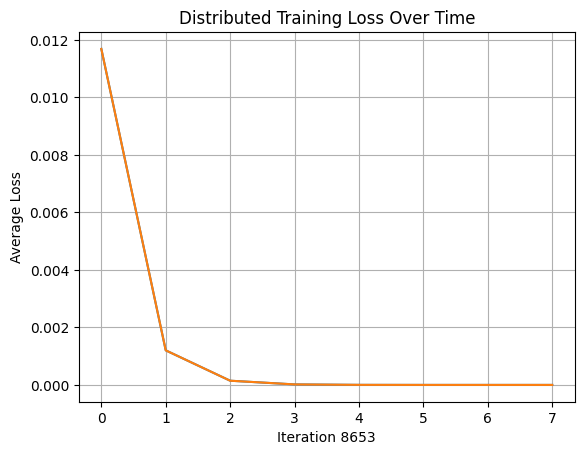

In [264]:
# generate linspace between -3 and 3
X = np.linspace(-3,3,1000)

# divide X among the N agents
X_agents = np.array_split(X, N)
X_vectorized = [np.array(design_matrix(X_agents[i])) for i in range(N)]
Y_agents = [f(X_a) for X_a in X_agents]

# theta of degree
thetas = np.random.rand(N, degree+1)
history = [thetas.copy()]
iters = 100000
losses = []
iter = 0
tol = 1e-9
beta = 0.9
avg_loss = 1
velocities = [np.zeros(degree+1) for _ in range(N)]
lr = 0.0001

while avg_loss > tol and iter < iters:
  iter += 1
  grads = []

  for i in range(N):
    grad = local_gradient(X_vectorized[i], thetas[i].T, Y_agents[i])
    velocities[i] = beta * velocities[i] - lr * grad
    thetas[i] += velocities[i]
    grads.append(grad)

    # Randomly pick a neighbour
    j = np.random.choice(g.neighbors(i))
    velocities[j] = beta * velocities[j] - lr * grads[i]
    thetas[j] = 0.5*(thetas[i] + thetas[j]) + velocities[j]

  # Compute and store loss after updates
  loss_values = [compute_loss(X_vectorized[i], thetas[i], Y_agents[i]) for i in range(N)]
  avg_loss = np.mean(loss_values)

  if iter % (0.01*iters) == 0:
    print(f"Iter {iter}: Losses per agent = {loss_values}, Avg loss = {avg_loss}")
    losses.append(avg_loss)
    history.append(thetas.copy())

#plot history
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel(f"Iteration {iter}")
plt.ylabel("Average Loss")
plt.title("Distributed Training Loss Over Time")
# plt.xscale('log')
plt.grid(True)
plt.plot(losses)
plt.show()

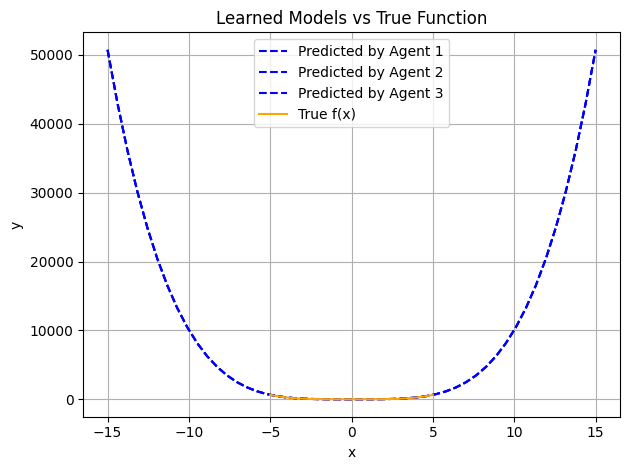

In [265]:
# Original (unnormalized) x values
x_full = np.linspace(-15.0, 15.0, 50)
x_orig = np.linspace(-5.0, 5.0, 50)

# Compute design matrices from normalized x
X_full = design_matrix(x_full)

# Use the final model from history
for i in range(N):
  # Predictions
  y_full = X_full @ thetas[i] # Corrected matrix multiplication order

  # Plotting
  plt.plot(x_full, y_full, color='blue', linestyle='--', label=f'Predicted by Agent {i+1}') # Added agent number to label

plt.plot(x_orig, f(x_orig), color='orange', label='True f(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Learned Models vs True Function')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()